**Veri Seti Hikayesi**

4 veri setimiz var:

* products: Ürün id'leri ile ürün ad ve fiyatların tutulduğu tablodur.
* customers: Müşteri id'leri ile müşteri ad soyad'ların tutulduğu tablodur.
* employees: Çalışan id'lerin tutulduğu tablodur.
* sales: Yapılan satışların kaç adet olduğu, hangi müşterinin aldığı ve hangi çalışan tarafından alındığını gösteren tablodur.


Veri setlerini okutalım

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv("customers.csv", engine="python" )
employees = pd.read_csv("employees.csv", engine="python" )
products = pd.read_csv("products.csv", engine="python" )
sales = pd.read_csv("sales.csv", engine="python" )



In [185]:
def check_df(dataframe, head=5):

    # boyut bilgisi
    print("############################ Shape #############################")
    print(dataframe.shape)

    # tip bilgisi
    print("############################ Types #################################")
    print(dataframe.dtypes)

    #Baştan gözlemleyelim
    print("########################## Head ############################")
    print(dataframe.head(head))

    #Sondan gözlemleyelim
    print("########################### Tail ###########################")
    print(dataframe.tail(head))

    #Veri setinde herhangi bir eksik değer var mı bakalım
    print("########################## NA #########################")
    print(dataframe.isnull().sum())

    #Tekrar etmiş veri var mı bakalım
    print("########################## Duplicate Data #######################")
    print(dataframe.duplicated().sum())




In [35]:

print(check_df(sales))





############################ Shape #############################
(1388921, 5)
############################ Types #################################
SalesID          int64
SalesPersonID    int64
CustomerID       int64
ProductID        int64
Quantity         int64
dtype: object
########################## Head ############################
   SalesID  SalesPersonID  CustomerID  ProductID  Quantity
0        4              1        4182        437       437
1        9              1           1          1        10
2       20              1        4182        437       437
3       25              1           1          1        26
4       33              1       13482         26       530
########################### Tail ###########################
         SalesID  SalesPersonID  CustomerID  ProductID  Quantity
1388916  6737591              4       11120        411       916
1388917  6737592              4       11120        411       916
1388918  6737593              4       11120        41

In [188]:
print(check_df(customers))


############################ Shape #############################
(275, 4)
############################ Types #################################
CustomerID        int64
FirstName        object
MiddleInitial    object
LastName         object
dtype: object
########################## Head ############################
   CustomerID FirstName MiddleInitial   LastName
0           1     Aaron           NaN  Alexander
1           5     Aaron           NaN    Coleman
2           8     Aaron           NaN     Flores
3          21     Aaron           NaN     Powell
4          24     Aaron           NaN       Shan
########################### Tail ###########################
     CustomerID FirstName MiddleInitial  LastName
270       19280    Walter             S   Navarro
271       19360     Wendy           NaN      Sanz
272       19440   William             K    Sotelo
273       19520     Wyatt           NaN  Thompson
274       19680    Yvonne           NaN     McKay
########################## NA #

In [37]:
print(check_df(products))


############################ Shape #############################
(267, 3)
############################ Types #################################
ProductID      int64
Name          object
Price        float64
dtype: object
########################## Head ############################
   ProductID                   Name  Price
0          1        Adjustable Race    1.6
1          2           Bearing Ball    0.8
2          3        BB Ball Bearing    2.4
3          4  Headset Ball Bearings    0.0
4          5                  Blade  189.6
########################### Tail ###########################
     ProductID                    Name   Price
262        498  Mountain-500 Black, 52  539.99
263        500       ML Bottom Bracket  101.24
264        501       HL Bottom Bracket  121.49
265        503      Road-750 Black, 48  539.99
266        504      Road-750 Black, 52  539.99
########################## NA #########################
ProductID    0
Name         0
Price        0
dtype: int64
####

In [38]:
print(check_df(employees))

############################ Shape #############################
(5, 1)
############################ Types #################################
EmployeeID    int64
dtype: object
########################## Head ############################
   EmployeeID
0           1
1           2
2           3
3           4
4           5
########################### Tail ###########################
   EmployeeID
0           1
1           2
2           3
3           4
4           5
########################## NA #########################
EmployeeID    0
dtype: int64
########################## Duplicate Data #######################
0
None


Burada customers tablosundaki, ikinci isim baş harf sütununun ayırt edici olup olmadığını kontrol ettim

In [156]:

df = pd.DataFrame(customers, columns = ['FirstName', 'LastName'])
isDuplicate = df[df.duplicated()]
print("Duplicate Rows :" )
isDuplicate.count()


Duplicate Rows :


FirstName    0
LastName     0
dtype: int64

Burada aynı isim, soyisimde kişi olmadığını gördüm ve bu yüzden MiddleInitial sütununu kaldırdım

In [157]:
customers.drop('MiddleInitial', axis=1,inplace=True)
customers

,CustomerID,FirstName,LastName
0,1,Aaron,Alexander
1,5,Aaron,Coleman
2,8,Aaron,Flores
3,21,Aaron,Powell
4,24,Aaron,Shan
...,...,...,...
270,19280,Walter,Navarro
271,19360,Wendy,Sanz
272,19440,William,Sotelo
273,19520,Wyatt,Thompson


Fiyatı 0 tl olan ürün var mı eğer varsa satılmışlar mı kontrolü sağladım 

In [45]:
products["Price"].describe()

count     267.000000
mean      474.253165
std       730.858277
min         0.000000
25%        49.990000
50%       196.400000
75%       539.990000
max      3578.270000
Name: Price, dtype: float64

In [97]:

df= products.loc[products['Price'] == 0.0]
df['ProductID'].isin(sales['ProductID']).value_counts()




True    33
Name: ProductID, dtype: int64

Satılan ürünlerin isimlerini öğrenmek için iki tabloyu birleştirdim ve ürünlerden ne kadar kazanıldığını görmek için earning adlı yeni bir sütun ekledim

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

In [200]:
merged = pd.merge( products,sales)
#newdf= merged.loc[merged['Price'] != 0.0]
indexPrice = merged[merged['Price'] == 0.00 ].index
merged.drop(indexPrice , inplace=True)
newdf=merged
newdf['Earning'] = newdf['Price'] * newdf['Quantity']
newdf.drop(['ProductID', 'SalesID'], axis=1,inplace=True)

print(newdf.drop_duplicates(subset=['Name', 'Price','SalesPersonID','CustomerID'], keep='last'))

                       Name  Price  SalesPersonID  CustomerID  Quantity  \
5720        Adjustable Race   1.60              1           1        11   
20441       Adjustable Race   1.60              1       19280         1   
21926       Adjustable Race   1.60              1       10000         1   
23515       Adjustable Race   1.60              2        1440       506   
24307       Adjustable Race   1.60              3       12640      1011   
...                     ...    ...            ...         ...       ...   
1387047   HL Bottom Bracket 121.49              4       18560       501   
1387048   HL Bottom Bracket 121.49              4       10720       501   
1387277  Road-750 Black, 48 539.99              1        2400      1008   
1388590  Road-750 Black, 52 539.99              1       12400      1009   
1388920  Road-750 Black, 52 539.99              4        1200       504   

           Earning  
5720         17.60  
20441         1.60  
21926         1.60  
23515       809

In [198]:
print(newdf.groupby('SalesPersonID')['Earning'].sum().reset_index().sort_values('Earning',ascending=False))

   SalesPersonID            Earning
0              1 126,540,241,422.85
1              2  86,808,311,381.15
3              4  55,554,794,833.07
2              3  36,826,921,216.37


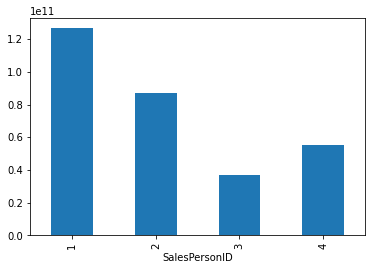

In [176]:
#Çalışanların satışlardan kazandırdığı para
salespersons = newdf.groupby(['SalesPersonID']).sum()
salespersons['Earning'].plot.bar()
plt.show()

SalesPersonID
1    228393563
2    152191904
4    147277833
3    124972062
Name: Quantity, dtype: int64


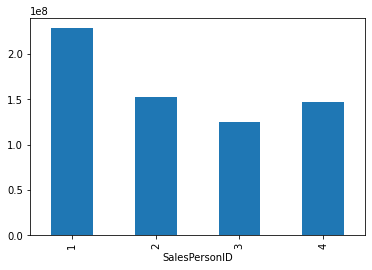

In [177]:
#Çalışanların kaç adet satış yaptığı
print(newdf.groupby('SalesPersonID')['Quantity'].sum().sort_values(ascending=False))
salespersons['Quantity'].plot.bar()
plt.show()

<AxesSubplot: ylabel='Quantity'>

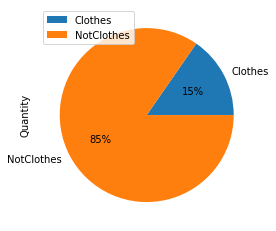

In [116]:
# Bonus: En çok hangi kategoriden ürün satılmış?
searchFor = ['Shorts', 'Gloves', 'Sleeve', 'Tights','Socks']
newdf["isClothes"] = newdf['Name'].apply(lambda x: 'Clothes' if any(i in x for i in searchFor) else 'NotClothes')
newdf


newdf.groupby(['isClothes']).sum().plot(kind='pie', y='Quantity',autopct='%1.0f%%')


In [183]:
#Bonus:en çok ürün satın alan 10 müşteri listesi
customer=newdf[['CustomerID', 'Quantity' ]].drop_duplicates(keep='last').nlargest(10, 'Quantity')
new = customer.loc[customer['Quantity'] >= 1000]
topcustomers = pd.merge(new,customers)
topcustomers

,CustomerID,Quantity,FirstName,LastName
0,2880,1012,Bruce,Torres
1,12640,1011,Lori,Alvarez
2,2640,1010,Brett,Rana
3,12400,1009,Leslie,Ortega
4,2400,1008,Bonnie,Chande
5,11920,1005,Kristine,Alvarez
6,9760,1003,Jésus,Blanco
7,9520,1002,Jeremy,Wright
8,19520,1002,Wyatt,Thompson
9,51,1001,Aaron,Nelson


In [162]:
#çalışanların hangi üründen kaç tane sattığı
newdf['Quantity'] = newdf['Quantity'].astype(str).astype(int)
stat = newdf.groupby(['SalesPersonID','Name'])['Quantity'].sum()
stat


SalesPersonID  Name                   
1              AWC Logo Cap                335048
               Adjustable Race              84393
               All-Purpose Bike Stand     1837473
               Bearing Ball                    24
               Blade                       203010
                                           ...   
4              Touring-1000 Yellow, 50     891480
               Touring-2000 Blue, 54          954
               Touring-3000 Blue, 44      1693445
               Touring-3000 Blue, 50      9212023
               Women's Tights, S              357
Name: Quantity, Length: 358, dtype: int64

In [180]:
#Müşterilerin hangi çalışandan ne kadar ürün satın aldığı.
stati = newdf.groupby(['CustomerID','SalesPersonID'])['Quantity'].sum().reset_index()
maxx=stati.sort_values('Quantity', ascending=False)
maxx


,CustomerID,SalesPersonID,Quantity
71,4000,3,24799295
230,14000,4,23744218
137,8240,4,23310906
203,12240,3,22634682
39,2240,2,22002753
...,...,...,...
33,1760,1,110
35,1920,3,80
192,11680,2,45
174,10240,2,30


In [178]:
#En çok satılan ürünler
dd = newdf.groupby(['SalesPersonID','Name'])['Quantity'].sum().reset_index()
fff=dd.sort_values('Quantity', ascending=False)
fff

,SalesPersonID,Name,Quantity
230,3,ML Mountain Tire,24795747
281,4,HL Mountain Tire,23740666
342,4,"Short-Sleeve Classic Jersey, M",23307543
232,3,"ML Road Frame-W - Yellow, 40",22630386
142,2,"ML Mountain Frame - Black, 48",21999321
...,...,...,...
261,3,Thin-Jam Hex Nut 5,44
91,1,Thin-Jam Hex Nut 15,42
3,1,Bearing Ball,24
324,4,Mountain End Caps,17


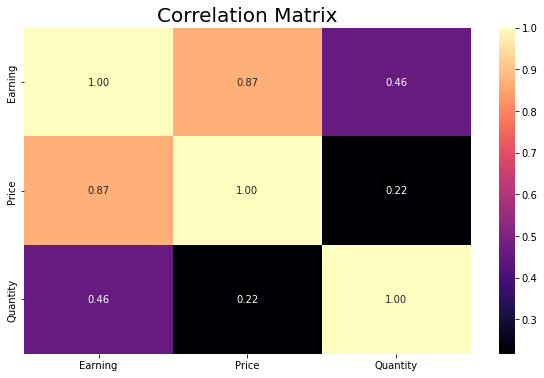

In [120]:
#Burada kazancın yüksek fiyatla mı yoksa yüksek adet sayısıyla mı daha ilintili olduğunu görmek istedim
num_cols = ['Earning', 'Price', 'Quantity']

newdf[num_cols].corr()

f, ax = plt.subplots(figsize=[10, 6])
sns.heatmap(newdf[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

Görselleştirmek için veri setinden %10luk bir örnek aldım

In [168]:
import pandas
import random
stati= newdf.drop_duplicates(["Name"])
stati = newdf.groupby(['SalesPersonID','Name'])['Quantity'].sum().reset_index()
maxx=stati.sort_values(by=['Quantity'], ascending=False)
print(maxx)
stati.to_csv('file1.csv')

filename = "file1.csv" 
n = sum(1 for line in open(filename))-1
s = n//10 
skip = sorted(random.sample(range(1, n+1), n-s)) 
df = pandas.read_csv(filename, skiprows=skip)

     SalesPersonID                            Name  Quantity
230              3                ML Mountain Tire  24795747
281              4                HL Mountain Tire  23740666
342              4  Short-Sleeve Classic Jersey, M  23307543
232              3    ML Road Frame-W - Yellow, 40  22630386
142              2   ML Mountain Frame - Black, 48  21999321
..             ...                             ...       ...
261              3              Thin-Jam Hex Nut 5        44
91               1             Thin-Jam Hex Nut 15        42
3                1                    Bearing Ball        24
324              4               Mountain End Caps        17
8                1                         Decal 2        15

[358 rows x 3 columns]


[Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')]

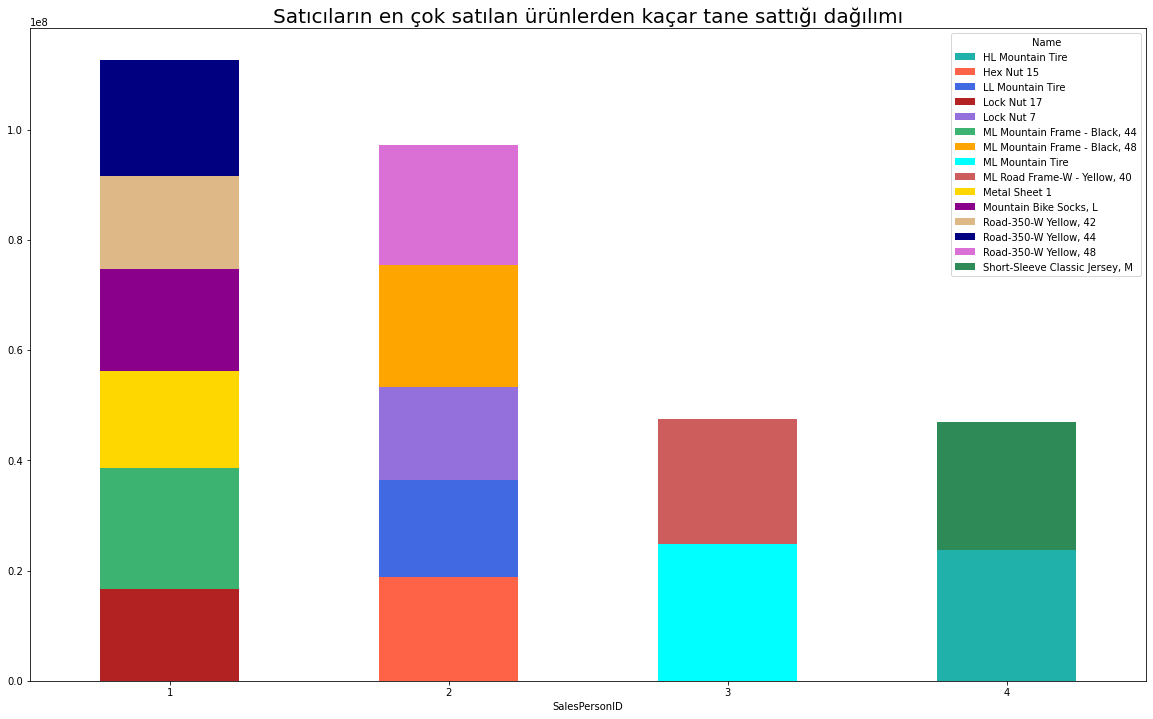

In [173]:
mostproducts= fff.head(15)
pivot = pd.pivot_table(data=mostproducts, index=['SalesPersonID'], columns=['Name'], values='Quantity')
pivot
my_colors = ['lightseagreen', 'tomato','royalblue','firebrick','mediumpurple','mediumseagreen','orange','aqua','indianred','gold','darkmagenta','burlywood','navy','orchid','seagreen']
ax = pivot.plot.bar(stacked=True, color =my_colors, figsize=(20,12))
ax.set_title('Satıcıların en çok satılan ürünlerden kaçar tane sattığı dağılımı', fontsize=20)
ax.set_xticklabels(['1','2','3','4'], rotation=0)

In [137]:
# Bonus: hangi satıcı en fazla hangi ürünü satmış sattıkları arasında
stati = newdf.groupby(['SalesPersonID','Name'])['Quantity'].max().reset_index()
maxx=stati.sort_values(by=['Quantity'], ascending=False)
maxx.head(10)





,SalesPersonID,Name,Quantity
272,4,Bearing Ball,1012
188,3,Adjustable Race,1011
113,2,Flat Washer 3,1010
181,2,Thin-Jam Hex Nut 16,1010
85,1,"Road-750 Black, 52",1009
84,1,"Road-750 Black, 48",1008
313,4,ML Bottom Bracket,1005
244,3,"Mountain-500 Black, 52",1003
166,2,"Mountain-500 Black, 48",1002
72,1,"Mountain-500 Black, 48",1002
